In [1]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from sklearn.metrics import silhouette_score

import os

#np.set_printoptions(precision=5, suppress=True)  

Text(0.5,0,'income')

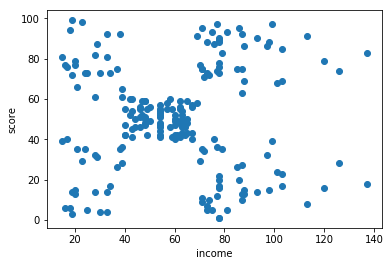

In [2]:
#setting up directory and dataframe
os.chdir("C:/Users/Windows 10/.spyder-py3/lavoro algoritmi")

c1 = pd.read_csv("Mall_Customers.csv", names=['x0', 'x1',"x2","x3","x4"], sep=";")
plt.scatter(c1['x3'],c1['x4'])
plt.ylabel('score')
plt.xlabel('income')



In [9]:
#function for computing the complete distance hierachical clustering, stopping at a certain number of clusters

def complete_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = -1

                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):
                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)
                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        clusters.pop(clust_2) 
    return(clusters)


#inizialization of the clustering procedure
def hierarchical(data, cluster_num, metric = 'complete'):
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x3'], row['x4']]])
    if metric is 'complete':
        return complete_distance(init_clusters, cluster_num)    

first cluster |  second cluster |  distance
48  |  49  |  0.0
64  |  67  |  0.0
127  |  129  |  0.0
153  |  155  |  0.0
21  |  23  |  1.0
49  |  51  |  1.0
57  |  58  |  1.0
59  |  61  |  1.0
60  |  61  |  1.0
61  |  62  |  1.0
66  |  69  |  1.0
67  |  68  |  1.0
68  |  70  |  1.0
69  |  71  |  1.0
80  |  85  |  1.0
82  |  85  |  1.0
86  |  91  |  1.0
87  |  94  |  1.0
89  |  90  |  1.0
91  |  96  |  1.0
101  |  102  |  1.0
129  |  135  |  1.0
130  |  134  |  1.0
147  |  151  |  1.0
3  |  5  |  1.4142135623730951
9  |  11  |  1.4142135623730951
23  |  25  |  1.4142135623730951
36  |  38  |  1.4142135623730951
47  |  50  |  1.4142135623730951
50  |  53  |  1.4142135623730951
56  |  59  |  1.4142135623730951
72  |  74  |  1.4142135623730951
73  |  77  |  1.4142135623730951
83  |  86  |  1.4142135623730951
97  |  102  |  1.4142135623730951
106  |  108  |  1.4142135623730951
115  |  124  |  1.4142135623730951
2  |  5  |  2.0
8  |  11  |  2.0
10  |  11  |  2.0
56  |  63  |  2.0
57  |  60  |

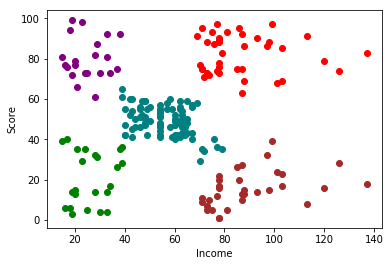

In [10]:
#running the function for num_clusters=5
import time
start = time.time()
clusters = hierarchical(c1,5)
end = time.time()
print(end - start)


colors = ['green', 'purple', 'teal', 'red', "brown", "yellow"]
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=6, color=colors[cluster_index])    
        plt.xlabel("Income")
        plt.ylabel("Score")


In [11]:
#silhouette score for num_clusters=5

preds=[]
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        preds.append([cluster_index])
preds


clusters2=clusters[0]+clusters[1]+clusters[2]+clusters[3]+clusters[4]

silhouette_score (clusters2, preds, metric='euclidean')




C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5529945955148896

C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


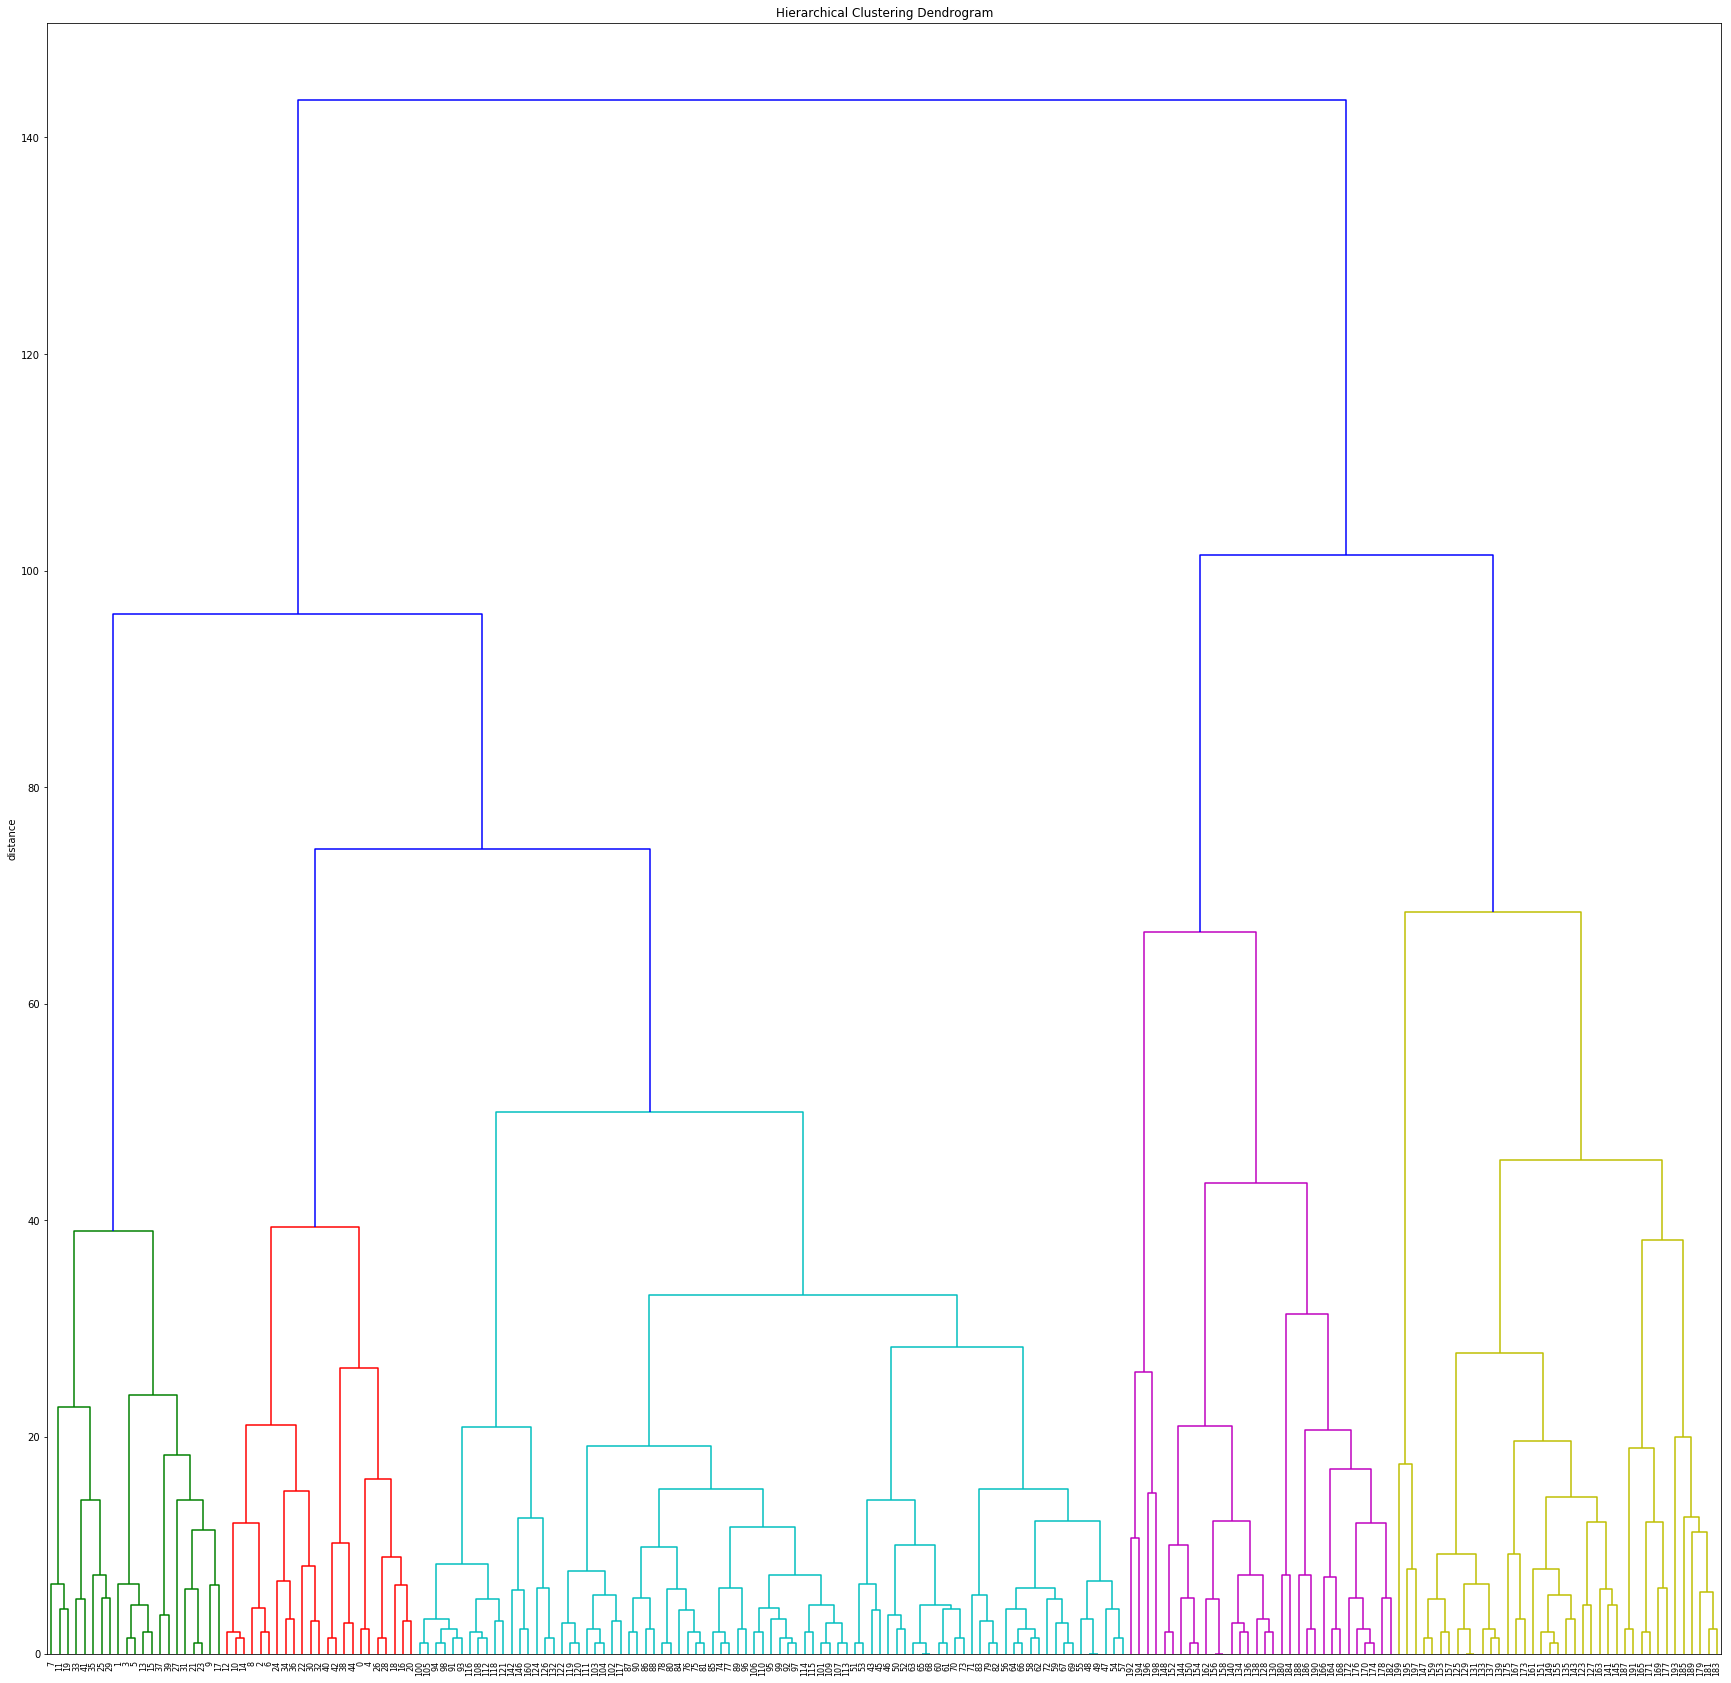

In [12]:
#dendrogram  function
X=c1.as_matrix()
X=X[:,(3,4)]

complete_link = linkage(X, 'complete',metric='euclidean')
complete_link

plt.figure(figsize=(30, 30))
plt.title('Hierarchical Clustering Dendrogram')

plt.ylabel('distance')
dendrogram(
    complete_link,
    leaf_rotation=90.,  
    leaf_font_size=8.,  
    color_threshold=70
)
plt.show()